In [19]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from qiskit.quantum_info import Operator
from qiskit.circuit.library import XGate
from qiskit import *
from qiskit.visualization import *
from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import least_busy
import numpy

# Load IBMQ Account

In [20]:
from qiskit import IBMQ
# following documentation from https://pypi.org/project/python-dotenv/
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.
import os
IBMQ.save_account(os.getenv('IBMQ_FREE_ACCOUNT'), overwrite=True)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-06-15 12:22:52,601: Credentials are already in use. The existing account in the session will be replaced.


In [21]:
# get available backends
#provider.backends()

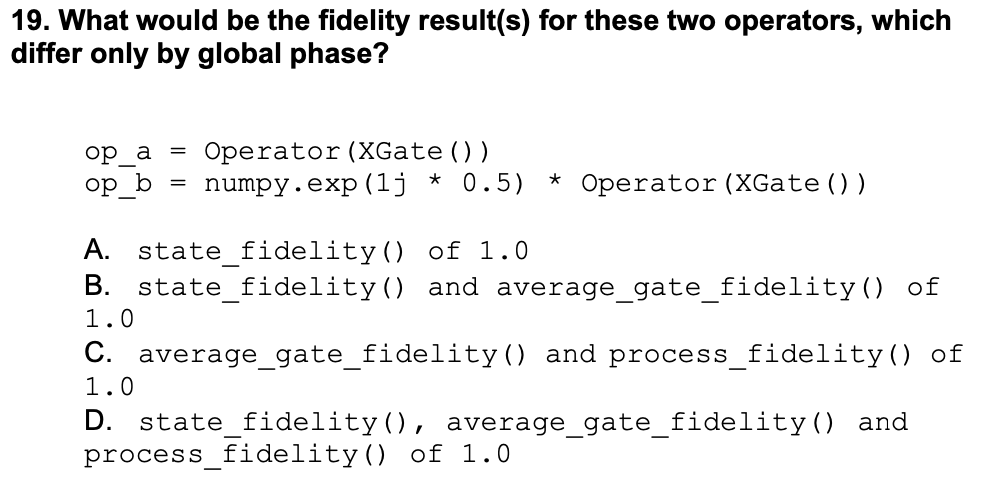

In [32]:
from IPython import display
display.Image("../Sample Question 19.png")

# The Question's Code

In [22]:
op_a = Operator(XGate())
op_b = numpy.exp(1j * 0.5) * Operator(XGate())

# Let's compare the measured results of these two operators

In [23]:
qc1 = QuantumCircuit(1, name="XGate")
qc1.append(op_a, [0])
qc1.measure_all()
qc1.draw()

┌─────────┐ ░ ┌─┐
   q_0: ┤ unitary ├─░─┤M├
        └─────────┘ ░ └╥┘
meas: 1/═══════════════╩═
                       0

In [24]:
qc2 = QuantumCircuit(1, name="XGate with Global Phase")
qc2.append(op_b, [0])
qc2.measure_all()
qc2.draw()

┌─────────┐ ░ ┌─┐
   q_0: ┤ unitary ├─░─┤M├
        └─────────┘ ░ └╥┘
meas: 1/═══════════════╩═
                       0

## Get results on qc1

In [27]:
# run it on real hardware to see if any physical effects are detected
real_hardware = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 1
                                    and not x.configuration().simulator
                                    and x.status().operational==True))
job = execute(qc1, backend=real_hardware, shots=1024)

In [28]:
result = job.result()
counts_qc1 = result.get_counts(qc1)
counts_qc1

{'0': 85, '1': 939}

## Get results on qc2

In [29]:
# run it on real hardware to see if any physical effects are detected
real_hardware = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 1
                                    and not x.configuration().simulator
                                    and x.status().operational==True))
job = execute(qc2, backend=real_hardware, shots=1024)

In [30]:
result = job.result()
counts_qc2 = result.get_counts(qc2)
counts_qc2

{'0': 88, '1': 936}

## Compare measured results 

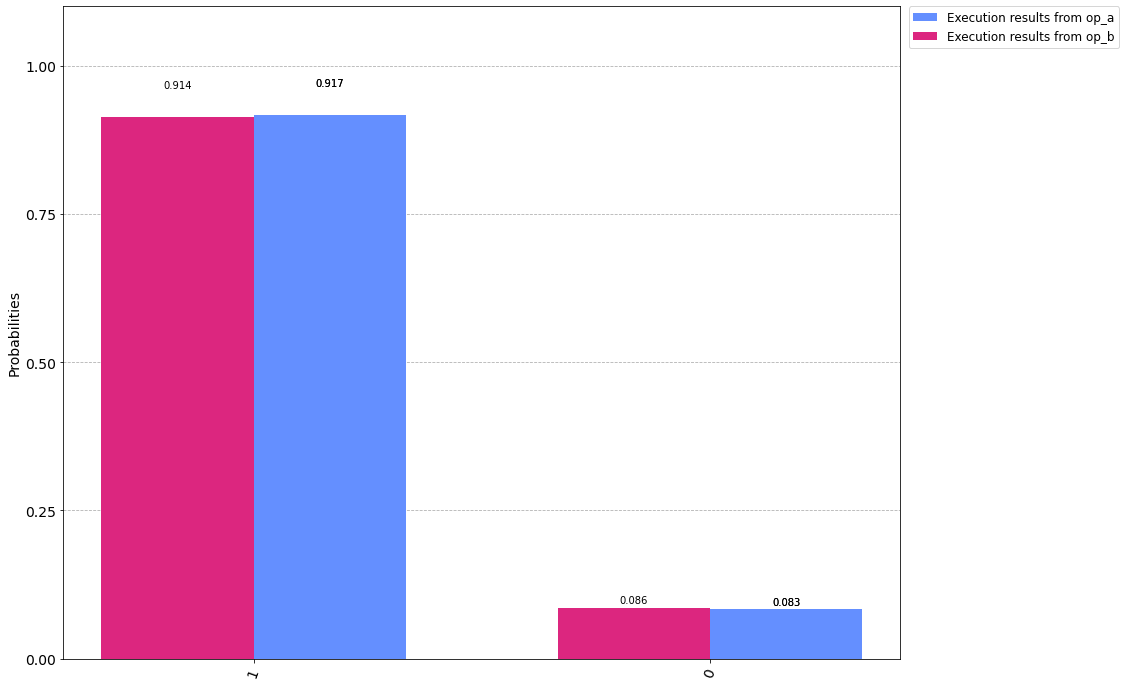

In [31]:
# see here for documentation: https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html#Options-when-plotting-a-histogram
plot_histogram([counts_qc1, counts_qc2], 
               legend=["Execution results from op_a", "Execution results from op_b"], 
               sort='desc', figsize=(15,12))

# Let's compare the fidelity of these two operators

## process fidelity

In [4]:
print(process_fidelity(op_b, target=op_a))

1.0


## average gate fidelity

In [5]:
print(average_gate_fidelity(op_b, target=op_a))

1.0


## state fidelity

In [7]:
print(state_fidelity(DensityMatrix(op_a, DensityMatrix(op_b))

1.0
